In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import dabl

In [2]:
pip install dabl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/sharmaroshan/Students-Performance-Analytics/master/StudentsPerformance.csv")

In [4]:
df.shape

(1000, 8)

In [5]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Descriptive Statistics

In [6]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Number of unique items in categorical columns

In [7]:
df.select_dtypes('object').nunique()

gender                         2
race/ethnicity                 5
parental level of education    6
lunch                          2
test preparation course        2
dtype: int64

## percentage of missing data in each columns present in the data :

In [11]:
no_of_rows=df.shape[0]
df.isnull().sum()/no_of_rows

gender                         0.0
race/ethnicity                 0.0
parental level of education    0.0
lunch                          0.0
test preparation course        0.0
math score                     0.0
reading score                  0.0
writing score                  0.0
dtype: float64

## Comparison of all attributes with respect to Maths marks


Target looks like regression


[<AxesSubplot: title={'center': 'Target distribution'}, xlabel='math score', ylabel='frequency'>,
 array([[<AxesSubplot: title={'center': 'F=8.04E-01'}, xlabel='reading score', ylabel='math score'>,
         <AxesSubplot: title={'center': 'F=7.78E-01'}, xlabel='writing score'>]],
       dtype=object),
 array([[<AxesSubplot: title={'center': 'F=4.68E-02'}, xlabel='math score', ylabel='gender'>,
         <AxesSubplot: title={'center': 'F=3.72E-02'}, xlabel='math score', ylabel='race/ethnicity'>,
         <AxesSubplot: title={'center': 'F=1.85E-02'}, xlabel='math score', ylabel='parental level of education'>,
         <AxesSubplot: title={'center': 'F=1.00E-02'}, xlabel='math score', ylabel='lunch'>,
         <AxesSubplot: title={'center': 'F=3.46E-03'}, xlabel='math score', ylabel='test preparation course'>]],
       dtype=object)]

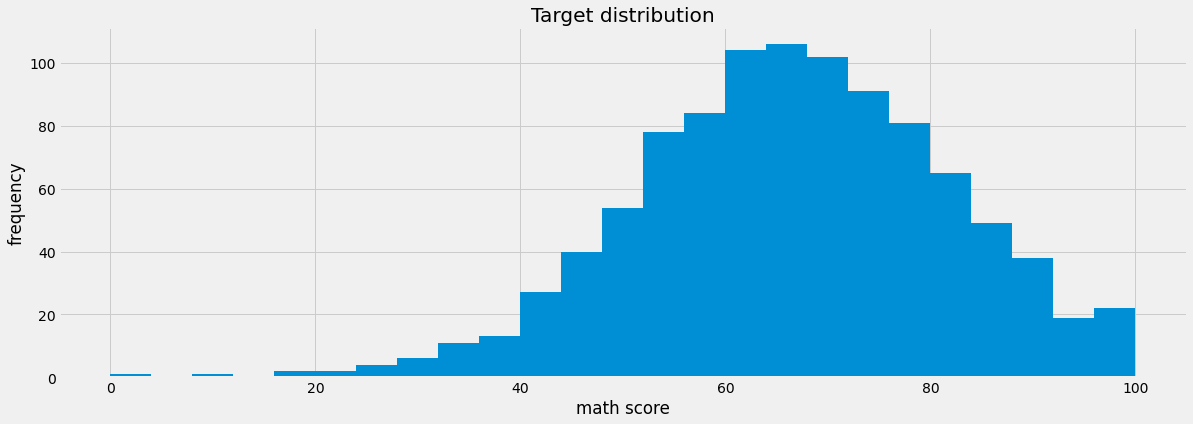

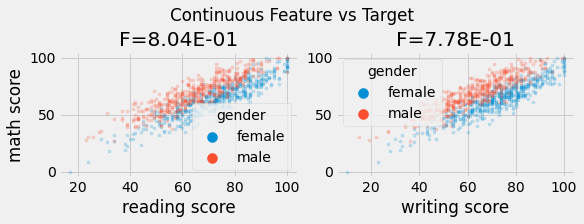

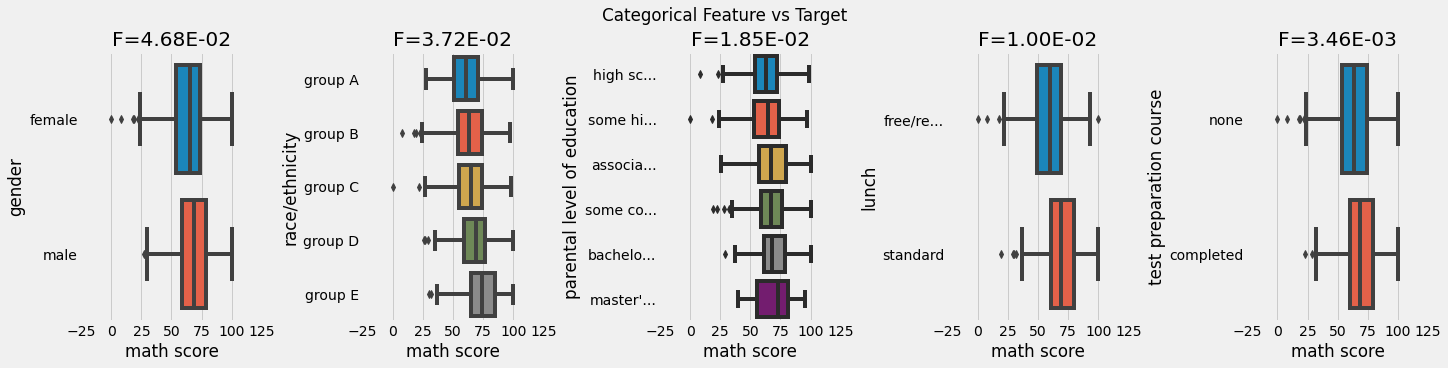

In [13]:
plt.rcParams['figure.figsize']=(18,6)
plt.style.use('fivethirtyeight')
dabl.plot(df, target_col='math score')

## Comparison of all other attributes with respect to reading marks

Target looks like regression


[<AxesSubplot: title={'center': 'Target distribution'}, xlabel='reading score', ylabel='frequency'>,
 array([[<AxesSubplot: title={'center': 'F=9.49E-01'}, xlabel='writing score', ylabel='reading score'>,
         <AxesSubplot: title={'center': 'F=8.04E-01'}, xlabel='math score'>]],
       dtype=object),
 array([[<AxesSubplot: title={'center': 'F=4.38E-02'}, xlabel='reading score', ylabel='gender'>,
         <AxesSubplot: title={'center': 'F=3.21E-02'}, xlabel='reading score', ylabel='race/ethnicity'>,
         <AxesSubplot: title={'center': 'F=2.81E-02'}, xlabel='reading score', ylabel='parental level of education'>,
         <AxesSubplot: title={'center': 'F=2.96E-03'}, xlabel='reading score', ylabel='lunch'>,
         <AxesSubplot: title={'center': 'F=0.00E+00'}, xlabel='reading score', ylabel='test preparation course'>]],
       dtype=object)]

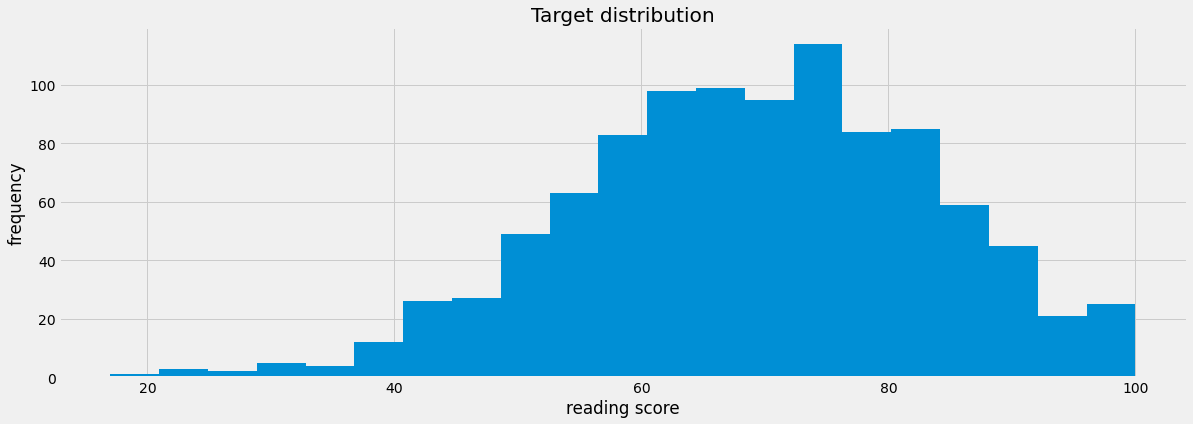

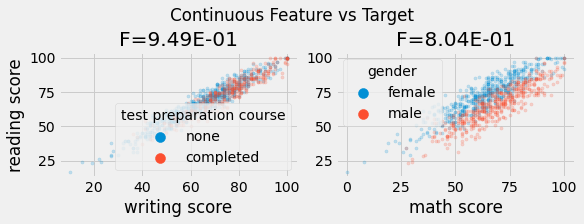

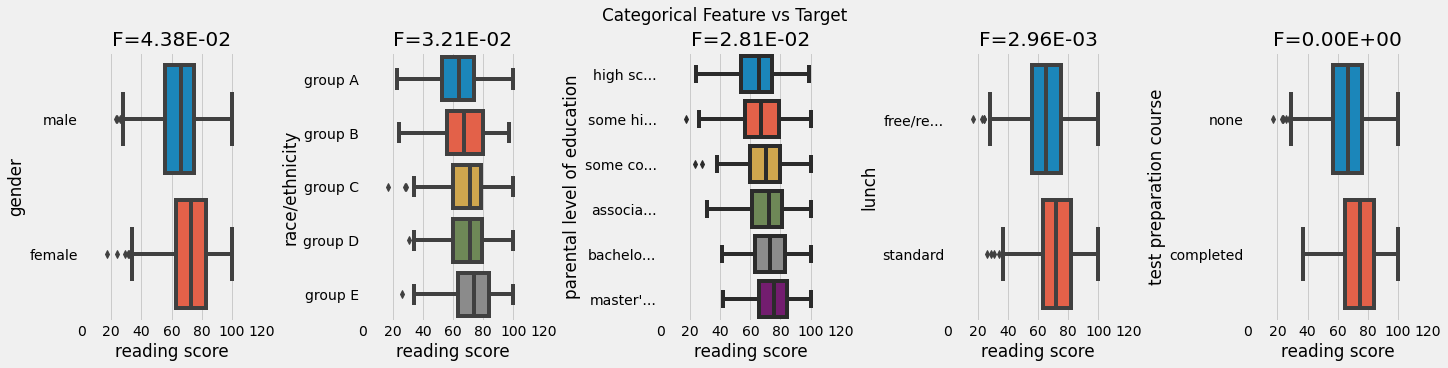

In [14]:
plt.rcParams['figure.figsize'] = (18, 6)
plt.style.use('fivethirtyeight')
dabl.plot(df, target_col = 'reading score')

## Effect of Lunch on Student’s Performnce

In [17]:
df[['lunch','gender','math score','writing score', 'reading score']].groupby(['lunch','gender']).agg('median')

math score  writing score  reading score
lunch        gender                                          
free/reduced female        57.0           68.0           67.0
             male          62.0           59.0           61.0
standard     female        67.0           76.0           75.0
             male          72.0           67.0           67.5

## Effect of Test Preparation Course on Scores

In [19]:
df[['test preparation course','gender','math score','writing score', 'reading score']].groupby(['test preparation course','gender']).agg('median')

math score  writing score  reading score
test preparation course gender                                          
completed               female        67.0           79.0           78.0
                        male          73.0           70.0           71.0
none                    female        62.0           70.0           71.0
                        male          67.0           60.0           63.0

## Data Visualization

## Number of men and women

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


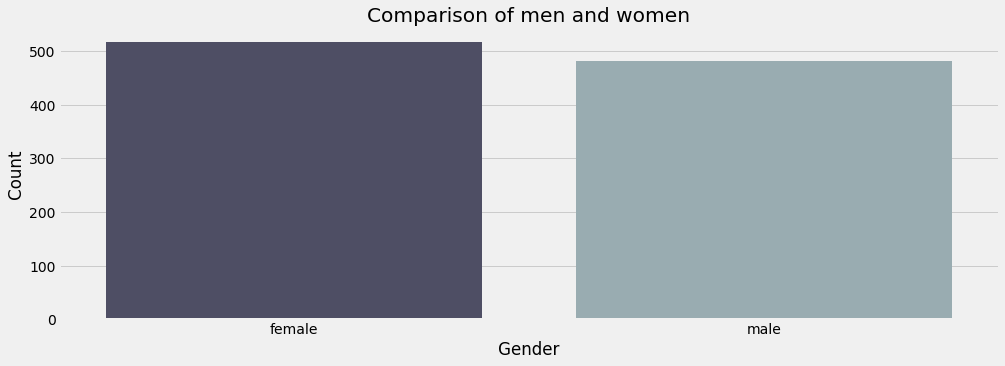

In [20]:
plt.rcParams['figure.figsize']=(15,5)
sns.countplot(df['gender'], palette='bone')
plt.title("Comparison of men and women", fontweight=30)
plt.xlabel('Gender')
plt.ylabel("Count")
plt.show()

## Different groups in the data set


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


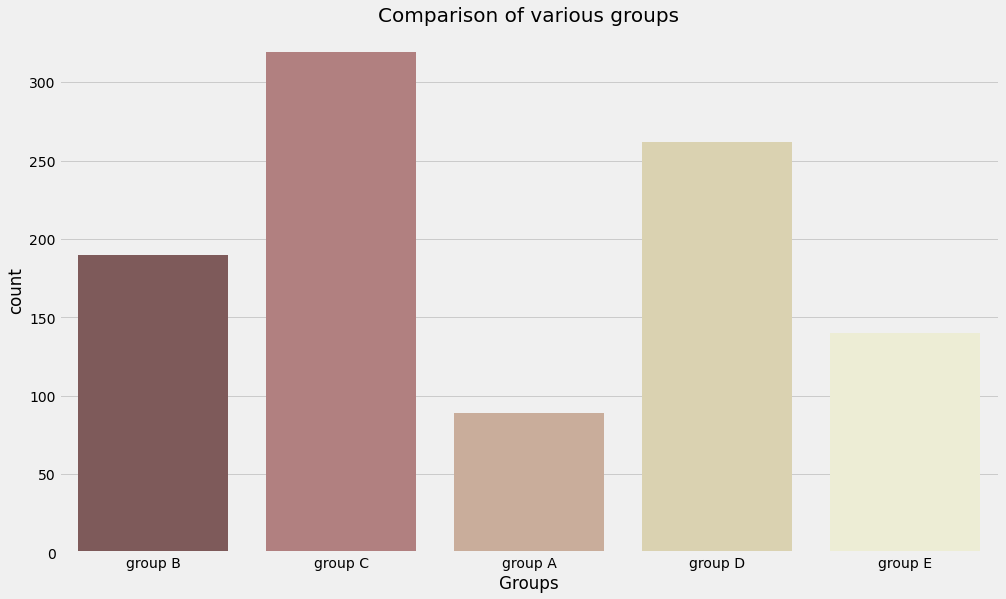

In [22]:
plt.rcParams['figure.figsize'] = (15, 9)
sns.countplot(df['race/ethnicity'], palette = 'pink')
plt.title('Comparison of various groups', fontweight = 30, fontsize = 20)
plt.xlabel('Groups')
plt.ylabel('count')
plt.show()

## different parental education levels

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


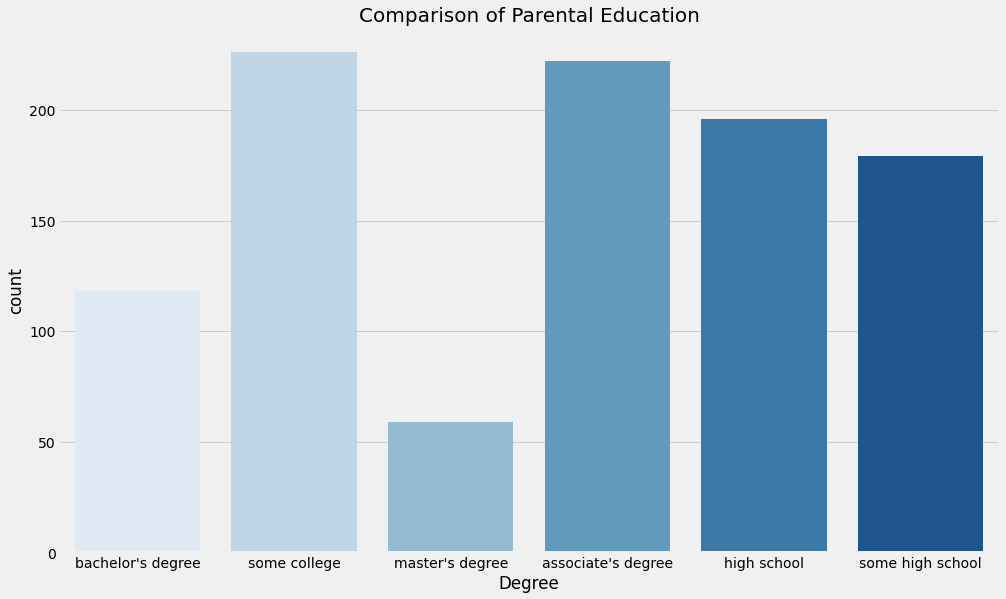

In [24]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')

sns.countplot(df['parental level of education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

##  Maths score



/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


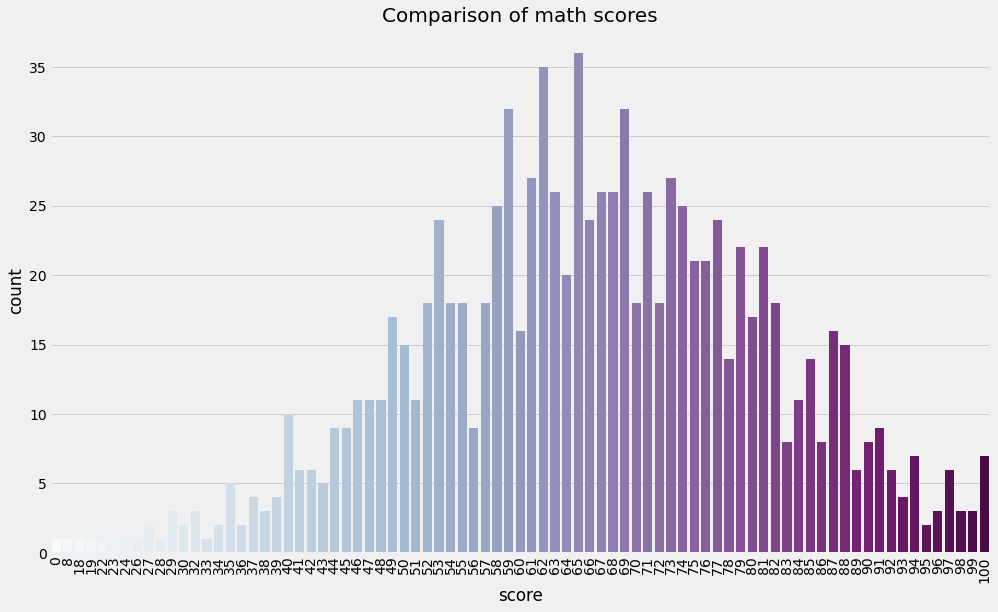

In [28]:
plt.rcParams['figure.figsize'] = (15, 9)
sns.countplot(df['math score'], palette = 'BuPu')
plt.title('Comparison of math scores', fontweight = 30, fontsize = 20)
plt.xlabel('score')
plt.ylabel('count')
plt.xticks(rotation = 90)
plt.show()

## Computing the total score for each student



/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


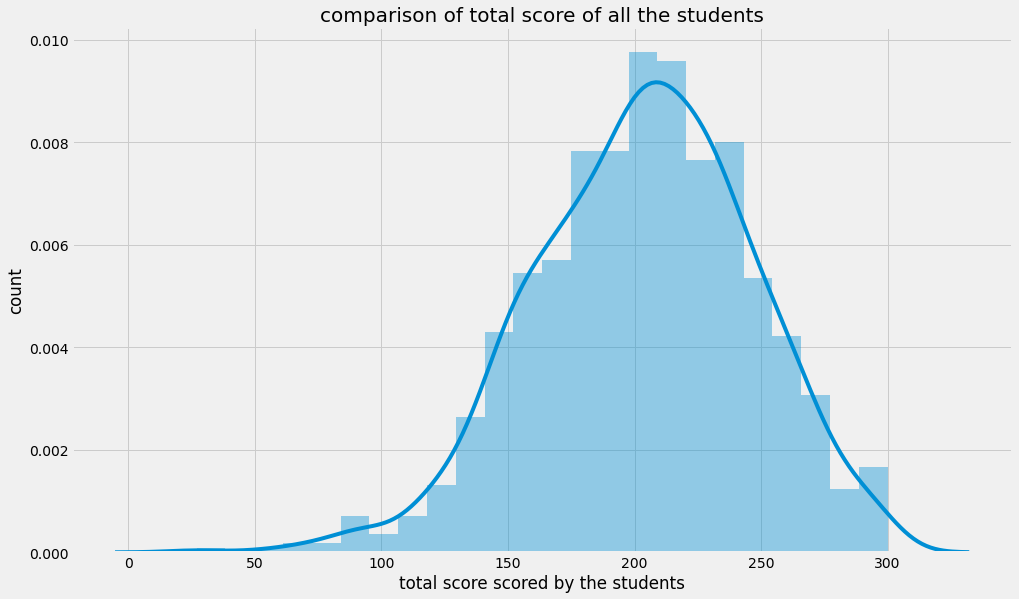

In [30]:
df['Total_Score']=df['math score']+df['reading score']+df['writing score']
sns.distplot(df['Total_Score'])
plt.title('comparison of total score of all the students', fontweight = 30, fontsize = 20)
plt.xlabel('total score scored by the students')
plt.ylabel('count')
plt.show()

## Computing percentage for each of the students



<ipython-input-41-db8f13665c14>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['percentage'][i]=ceil(df['percentage'][i])
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


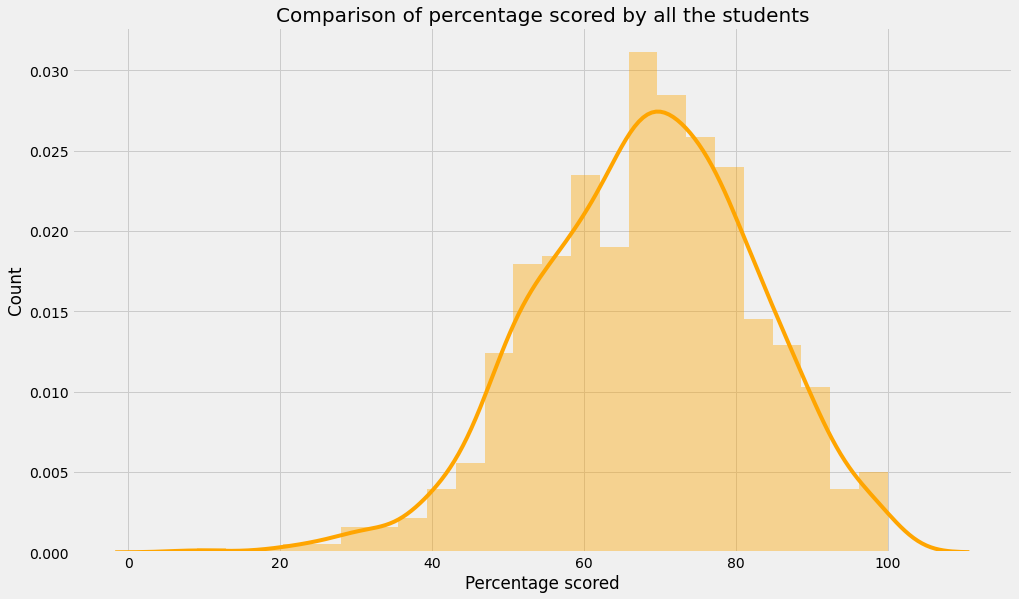

In [41]:
from math import *
df['percentage']=df['Total_Score']/3
for i in range(0,1000):
  df['percentage'][i]=ceil(df['percentage'][i])
plt.rcParams['figure.figsize'] = (15, 9)
sns.distplot(df['percentage'], color = 'orange')

plt.title('Comparison of percentage scored by all the students', fontweight = 30, fontsize = 20)
plt.xlabel('Percentage scored')
plt.ylabel('Count')
plt.show()